In [1]:
import pandas as pd

blood_transfusion = pd.read_csv('blood_transfusion.csv')
data = blood_transfusion.drop(columns=['Class'])
target = blood_transfusion['Class']

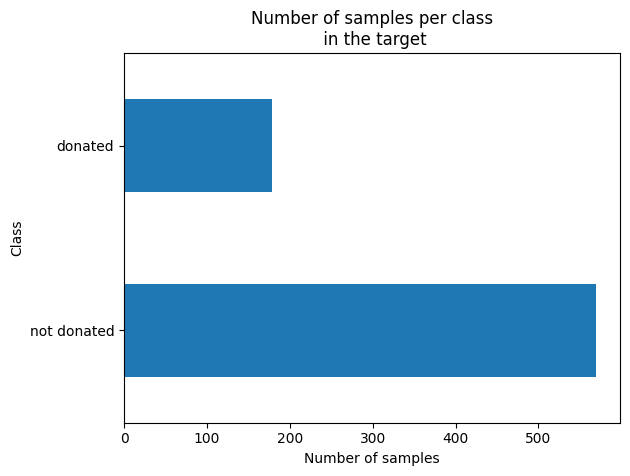

In [2]:
import matplotlib.pyplot as plt

target.value_counts().plot.barh()
plt.xlabel('Number of samples')
_ = plt.title('Number of samples per class\n in the target')

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.5, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(data_train, target_train)

LogisticRegression()

In [6]:
new_donor = pd.DataFrame({
    'Recency': [6],
    'Frequency': [2],
    'Monetary': [1000],
    'Time': [20]
})


In [7]:
classifier.predict(new_donor)

array(['not donated'], dtype=object)

In [8]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'not donated'], dtype=object)

In [9]:
target_test == target_predicted

580     True
356     True
133     True
250     True
299     True
       ...  
701     True
649     True
185     True
503    False
464     True
Name: Class, Length: 374, dtype: bool

In [10]:
import numpy as np

In [11]:
np.mean(target_test == target_predicted)

0.7540106951871658

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.754


In [13]:
classifier.score(data_test, target_test)

0.7540106951871658

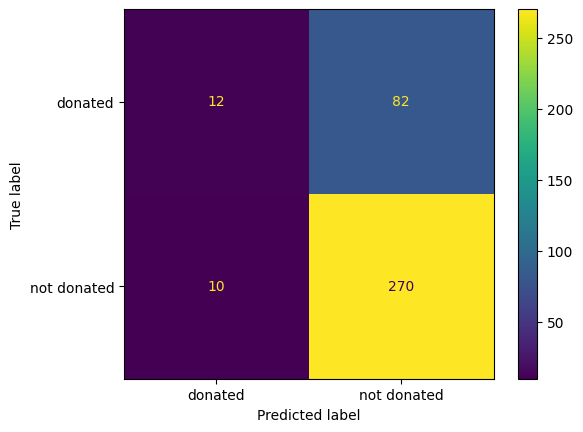

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, data_test, target_test)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(target_test, target_predicted, pos_label='donated')
recall = recall_score(target_test, target_predicted, pos_label='donated')
f1 = f1_score(target_test, target_predicted, pos_label='donated')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}") 
print(f"F1 score: {f1:.3f}")

Precision: 0.545
Recall: 0.128
F1 score: 0.207


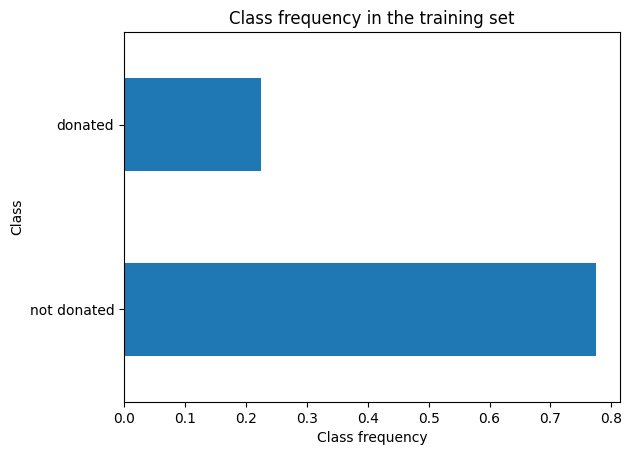

In [17]:
target_train.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

In [18]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(data_train, target_train)
print(f"Accuracy: {dummy_classifier.score(data_test, target_test):.3f}")

Accuracy: 0.749


In [19]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(target_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.546


In [20]:
target_proba_predicted = pd.DataFrame(
    classifier.predict_proba(data_test),
    columns=classifier.classes_
)
target_proba_predicted[:5]

,donated,not donated
0,0.343981,0.656019
1,0.074466,0.925534
2,0.290482,0.709518
3,0.137999,0.862001
4,0.092644,0.907356


In [21]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'not donated'], dtype=object)

In [22]:
equivalence_pred_proba = (
    target_proba_predicted.idxmax(axis=1).to_numpy() ==target_predicted
)
np.all(equivalence_pred_proba)

True

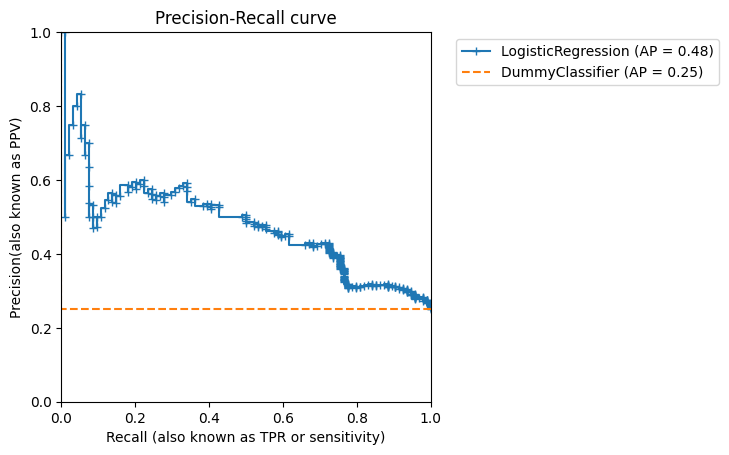

In [24]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(classifier, data_test, target_test, pos_label='donated', marker='+')

disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label='donated',
    color = "tab:orange",
    linestyle = '--',
    ax=disp.ax_
)
plt.xlabel("Recall (also known as TPR or sensitivity)")
plt.ylabel("Precision(also known as PPV)")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
_ = disp.ax_.set_title("Precision-Recall curve")

In [25]:
prevalence = target_test.value_counts()[1] / target_test.value_counts().sum()
print(f"Prevalence of the class 'donated': {prevalence:.3f}")

Prevalence of the class 'donated': 0.251


C:\Users\samue\AppData\Local\Temp\ipykernel_31336\1735577769.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prevalence = target_test.value_counts()[1] / target_test.value_counts().sum()


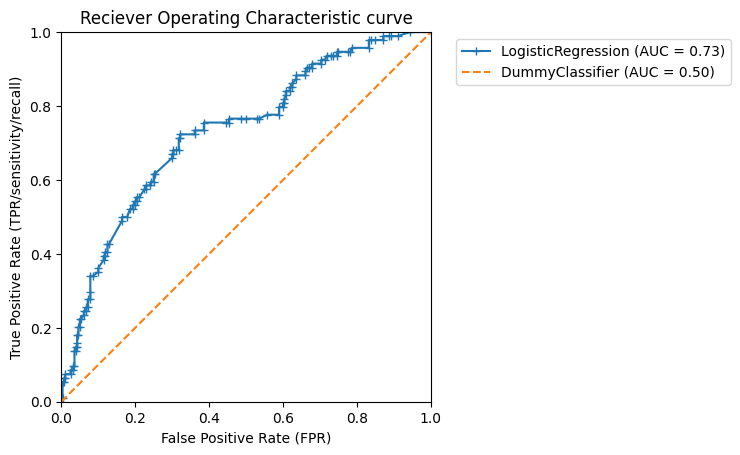

In [26]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(classifier, data_test, target_test, pos_label='donated', marker='+')
disp = RocCurveDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label='donated',
    color='tab:orange',
    linestyle='--',
    ax=disp.ax_
)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR/sensitivity/recall)")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = disp.ax_.set_title("Reciever Operating Characteristic curve")

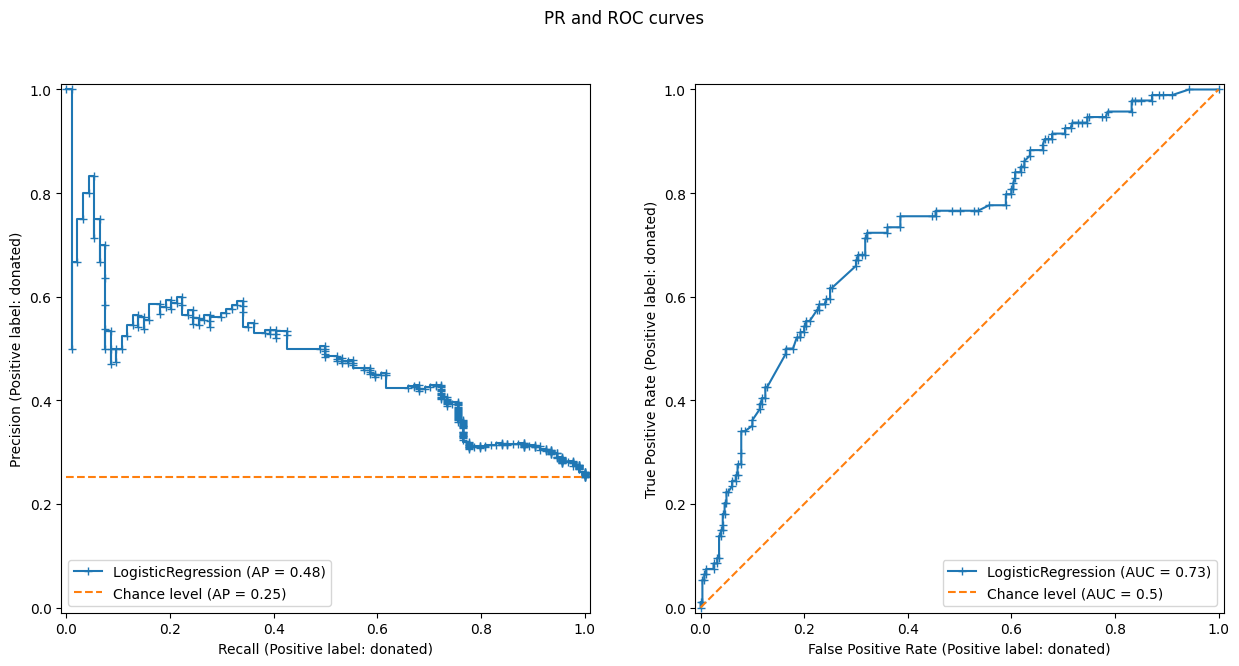

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

PrecisionRecallDisplay.from_estimator(
    classifier,
    data_test,
    target_test,
    pos_label="donated",
    marker="+",
    plot_chance_level=True,
    chance_level_kw={"color": "tab:orange", "linestyle": "--"},
    ax=axs[0],
)
RocCurveDisplay.from_estimator(
    classifier,
    data_test,
    target_test,
    pos_label="donated",
    marker="+",
    plot_chance_level=True,
    chance_level_kw={"color": "tab:orange", "linestyle": "--"},
    ax=axs[1],
)

_ = fig.suptitle("PR and ROC curves")